Ce notebook a pour but de tester une autre approche de learning qui consiste à l'utilisation de DNN (Deep Neural Network) pour la prise de décision dans notre jeu. \
Le procédé est presque identique à celui du Q-Learning, sauf que cette fois-ci, on utilise un réseau de neurones au lieu d'une Q-table. \
On appelle cette méthode le Deep Q-Learning.

Pour faire ce code, je me suis inspiré de cette personne : https://github.com/fakemonk1/Reinforcement-Learning-Lunar_Lander/blob/master/Lunar_Lander.py

## 1. Importation des librairies

In [1]:
import gymnasium as gym # environnement.
from tools import * # fonctions utiles.

## 2. Création de l'environnement

In [3]:
# Crée l'environnement blackjack.
# natural = True : Si le joueur fait 21 avec deux cartes (As + 10), il obtient une reward plus élevée.
# sab = True : natural est ignoré (reward de 1 même si 21 avec deux cartes) et si le joueur ainsi que le croupier font 21, il s'agira d'un match nul.
env = gym.make('Blackjack-v1', natural=False, sab=True)

# Sans bouclier

## 3. Entrainement de l'Agent

In [3]:
# Paramètres pour l'entrainement.
total_train_episodes = 5_000
alpha = 0.2
gamma = 0.3
epsilon_schedule = creation_epsilon_schedule(total_train_episodes) # Voir fichier tools.py

# Notre agent.
agent = Agent(env, alpha, gamma, False) # Voir fichier tools.py

# Entrainement de notre agent.
for episode in range(total_train_episodes):
    # Voir la progression de l'entrainement.
    if episode % 100 == 0:
        print(f'Episode {episode+1}')

    # Début de notre environnement pour le résoudre.
    first_obs = env.reset()[0]
    action = agent.action_training(first_obs, epsilon_schedule[episode]) # Voir fichier tools.py
    second_obs, reward, done, _, _ = env.step(action)
    agent.remember(first_obs, action, reward, second_obs, done) # Voir fichier tools.py

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = agent.action_training(second_obs, epsilon_schedule[episode]) # Voir fichier tools.py
        next_obs, reward, done, _, _ = env.step(action)
        agent.remember(second_obs, action, reward, next_obs, done) # Voir fichier tools.py
        second_obs = next_obs
    
    agent.train(16)

env.close()

Episode 1
Episode 101
Episode 201


## 4. Sauvegarde du modèle

In [7]:
# Sauvegarde le DNN de notre agent.
agent.save('DNN_noshield.h5') # Voir fichier tools.py

## 5. Chargement du modèle

In [10]:
# Chargement du DNN de notre agent.
agent = Agent(env, alpha, gamma, False) # Voir fichier tools.py
alpha = 0.2
gamma = 0.3
agent.load('DNN_noshield.h5') # Voir fichier tools.py

## 6. Test de notre agent

In [11]:
# Paramètres pour le test.
total_episodes = 1_000
total_win = 0
total_draw = 0
total_loose = 0

for episode in range(total_episodes):

    if episode % 100 == 0:
        print(f'Episode {episode+1}')
    
    # Début de notre environnement pour le résoudre.
    first_obs = env.reset()[0]
    action = agent.action(first_obs) # Voir fichier tools.py
    second_obs, reward, done, _, _ = env.step(action)

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = agent.action(second_obs) # Voir fichier tools.py
        next_obs, reward, done, _, _ = env.step(action)
        second_obs = next_obs
    
    # Compréhension du résultat du jeu.
    if reward == 1:
        total_win += 1
    elif reward == -1:
        total_loose += 1
    else:
        total_draw += 1

env.close()

Episode 1
Episode 101
Episode 201
Episode 301
Episode 401
Episode 501
Episode 601
Episode 701
Episode 801
Episode 901


## 7. Interprétation des résultats

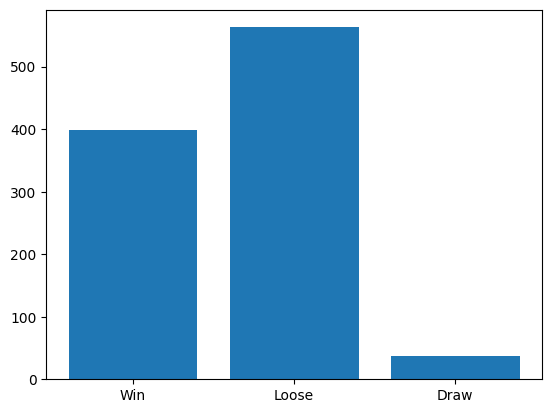

Win : 39.900000000000006 %
Loose : 56.3 %
Draw : 3.8 %


In [12]:
barplot(total_win, total_loose, total_draw, total_episodes) # Voir fichier tools.py

# Avec bouclier

## 8. Entrainement de l'Agent

In [16]:
# Paramètres pour l'entrainement.
total_train_episodes = 300
alpha = 0.2
gamma = 0.3
epsilon_schedule = creation_epsilon_schedule(total_train_episodes) # Voir fichier tools.py

# Notre agent.
agent = Agent(env, alpha, gamma, True) # Voir fichier tools.py

# Entrainement de notre agent.
for episode in range(total_train_episodes):
    # Voir la progression de l'entrainement.
    if episode % 100 == 0:
        print(f'Episode {episode+1}')

    # Début de notre environnement pour le résoudre.
    first_obs = env.reset()[0]
    action = agent.action_training(first_obs, epsilon_schedule[episode]) # Voir fichier tools.py
    second_obs, reward, done, _, _ = env.step(action)
    agent.remember(first_obs, action, reward, second_obs, done) # Voir fichier tools.py

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = agent.action_training(second_obs, epsilon_schedule[episode]) # Voir fichier tools.py
        next_obs, reward, done, _, _ = env.step(action)
        agent.remember(second_obs, action, reward, next_obs, done) # Voir fichier tools.py
        second_obs = next_obs
    
    agent.train(16)

env.close()

Episode 1
Episode 101
Episode 201


## 9. Sauvegarde du modèle

In [17]:
# Sauvegarde le DNN de notre agent.
agent.save('DNN_withshield.h5') # Voir fichier tools.py

## 10. Chargement du modèle

In [18]:
# Chargement du DNN de notre agent.
agent = Agent(env, alpha, gamma, True) # Voir fichier tools.py
alpha = 0.2
gamma = 0.3
agent.load('DNN_withshield.h5') # Voir fichier tools.py

## 11. Test de notre Agent

In [19]:
# Paramètres pour le test.
total_episodes = 1_000
total_win = 0
total_draw = 0
total_loose = 0

for episode in range(total_episodes):

    if episode % 100 == 0:
        print(f'Episode {episode+1}')
    
    # Début de notre environnement pour le résoudre.
    first_obs = env.reset()[0]
    action = agent.action(first_obs) # Voir fichier tools.py
    second_obs, reward, done, _, _ = env.step(action)

    # Boucle pour éxécuter plusieurs actions si nécessaire jusqu'à ce que le jeu soit terminé.
    while not done:
        action = agent.action(second_obs)
        next_obs, reward, done, _, _ = env.step(action)
        second_obs = next_obs
    
    # Compréhension du résultat du jeu.
    if reward == 1:
        total_win += 1
    elif reward == -1:
        total_loose += 1
    else:
        total_draw += 1

env.close()

Episode 1
Episode 101
Episode 201
Episode 301
Episode 401
Episode 501
Episode 601
Episode 701
Episode 801
Episode 901


## 12. Interprétation des résultats

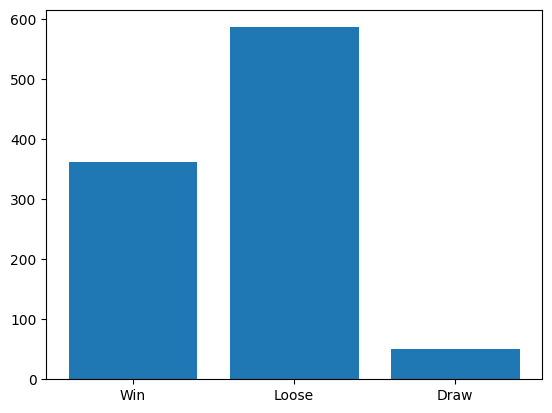

Win : 36.199999999999996 %
Loose : 58.699999999999996 %
Draw : 5.1 %


In [20]:
barplot(total_win, total_loose, total_draw, total_episodes) # Voir fichier tools.py